In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_org = pd.read_csv("./src/variable_length_dataset.csv", names=["strand","energy"],dtype={0: str, 1: float})
data_org["strand_len"] = data_org.strand.apply(len)
std = data_org.energy.std()
avg = data_org.energy.mean()
max_len = data_org.strand_len.max()
min_len = data_org.strand_len.min()
avg_len = data_org.strand_len.mean()
print(f"min_len {min_len},\n avg_len {avg_len},\n max_len {max_len},\n avg {avg},\n std {std}")

min_len 20,
 avg_len 40.0387,
 max_len 60,
 avg -3.3849239112138747,
 std 2.3469788402778575


In [34]:
rsltdf = pd.read_csv("train_6.csv")
rsltdf["rmse"] = rsltdf.min_test_mse.apply(np.sqrt)
rsltdf[["EPOCH", "BATCH_SIZE", "LR", "N_HIDDEN_UNITS", "NUM_LAYERS","min_val_loss_id", "min_val_loss", "min_test_mse_id", "min_test_mse","rmse"]].sort_values("min_test_mse")

,EPOCH,BATCH_SIZE,LR,N_HIDDEN_UNITS,NUM_LAYERS,min_val_loss_id,min_val_loss,min_test_mse_id,min_test_mse,rmse
22,50,10,0.00300,12,1.0,38,0.422213,38,2.336653,1.528611
23,50,10,0.00250,12,1.0,45,0.433460,45,2.361001,1.536555
18,50,10,0.00200,12,1.0,46,0.437967,43,2.387686,1.545214
17,50,10,0.00200,12,1.0,45,0.431397,45,2.388576,1.545502
19,50,10,0.00200,12,2.0,46,0.435837,40,2.399212,1.548939
21,50,10,0.00200,12,2.0,40,0.441953,49,2.413777,1.553634
20,50,10,0.00200,12,1.0,40,0.437716,43,2.426003,1.557563
11,40,10,0.00100,12,1.0,38,0.443994,38,2.432912,1.559779
13,50,10,0.00100,12,1.0,48,0.443881,43,2.433660,1.560019
10,40,10,0.00100,16,1.0,39,0.446207,38,2.442863,1.562966


best mse 2.336652794741574, best rmse 1.5286113942861914


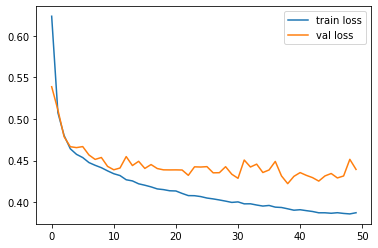

In [36]:


best_row = rsltdf.loc[22]
print(f"best mse {best_row.min_test_mse}, best rmse {best_row.rmse}")
# test_rmse = np.array(best_row["rmse"][1:-1].split(", ")).astype(float)
test_mse = np.array(best_row["test_mse_list"][1:-1].split(", ")).astype(float)
val_loss = np.array(best_row["val_loss_list"][1:-1].split(", ")).astype(float)
train_loss = np.array(best_row["train_loss_list"][1:-1].split(", ")).astype(float)
# x = 

x = np.arange(len(train_loss))
  
# # plot lines
plt.plot(x, train_loss, label = "train loss")
plt.plot(x, val_loss, label = "val loss")
plt.legend()
plt.show()